# 特徵選取
## 簡易的自行開發作法(From scratch)

In [1]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

## 載入資料

In [11]:
X, y = load_wine(return_X_y=True, as_frame=True)

## 資料分割

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

## 模型訓練及評估函數

In [49]:
from sklearn.metrics import accuracy_score

def calc_score(X_train, y_train, X_test, y_test, indices):
    estimator=LogisticRegression()
    # print(indices, X_train.shape)
    estimator.fit(X_train[:, indices], y_train)
    y_pred = estimator.predict(X_test[:, indices])
    score = accuracy_score(y_test, y_pred)
    return score

In [50]:
# 隱藏警告訊息
import warnings
warnings.filterwarnings('ignore')

## 測試選取2個特徵的所有組合

In [51]:
from itertools import combinations
import numpy as np

scores = []
subsets = []

dim=2 #X.shape[1]
indices_ = tuple(range(X.shape[1]))
for p in combinations(indices_, r=dim):
    score = calc_score(X_train, y_train, X_test, y_test, p)
    print(p, score)
    scores.append(score)
    subsets.append(p)

(0, 1) 0.7752808988764045
(0, 2) 0.7415730337078652
(0, 3) 0.7865168539325843
(0, 4) 0.7078651685393258
(0, 5) 0.8651685393258427
(0, 6) 0.9325842696629213
(0, 7) 0.7191011235955056
(0, 8) 0.7528089887640449
(0, 9) 0.8314606741573034
(0, 10) 0.8314606741573034
(0, 11) 0.8876404494382022
(0, 12) 0.8651685393258427
(1, 2) 0.5955056179775281
(1, 3) 0.6179775280898876
(1, 4) 0.5730337078651685
(1, 5) 0.7191011235955056
(1, 6) 0.7528089887640449
(1, 7) 0.48314606741573035
(1, 8) 0.550561797752809
(1, 9) 0.7640449438202247
(1, 10) 0.550561797752809
(1, 11) 0.6966292134831461
(1, 12) 0.7752808988764045
(2, 3) 0.5842696629213483
(2, 4) 0.5168539325842697
(2, 5) 0.7303370786516854
(2, 6) 0.797752808988764
(2, 7) 0.5168539325842697
(2, 8) 0.5842696629213483
(2, 9) 0.6853932584269663
(2, 10) 0.6629213483146067
(2, 11) 0.7191011235955056
(2, 12) 0.6966292134831461
(3, 4) 0.5393258426966292
(3, 5) 0.7191011235955056
(3, 6) 0.8202247191011236
(3, 7) 0.4943820224719101
(3, 8) 0.6179775280898876
(3, 9

## 找出準確率最高的組合

In [52]:
best = np.argmax(scores)
indices_ = subsets[best]
print(best, indices_, scores[best])

5 (0, 6) 0.9325842696629213


## 準確率最高的組合為(0, 6)，名稱分別為()

In [53]:
[np.array(X.columns)[i] for i in indices_]

['alcohol', 'flavanoids']

## 測試選取1~13個特徵的所有組合

In [54]:
# 執行有點久
from itertools import combinations

scores = []
subsets = []

best_score_list=[]
best_indices_list=[]
for dim in range(1, X.shape[1]+1): 
    scores=[]
    subsets = []
    indices_ = tuple(range(X.shape[1]))
    for p in combinations(indices_, r=dim):
        score = calc_score(X_train, y_train, X_test, y_test, p)
        #print(p, score)
        scores.append(score)
        subsets.append(p)
    
    best = np.argmax(scores)
    indices_ = subsets[best]
    print(best, indices_, scores[best])
    best_score_list.append(scores[best])
    best_indices_list.append(indices_)

6 (6,) 0.7528089887640449
5 (0, 6) 0.9325842696629213
262 (6, 9, 12) 0.9662921348314607
57 (0, 2, 3, 6) 0.9662921348314607
1268 (6, 7, 8, 9, 12) 0.9775280898876404
1235 (1, 6, 7, 8, 9, 12) 0.9775280898876404
32 (0, 1, 2, 3, 5, 6, 11) 0.9662921348314607
93 (0, 1, 2, 3, 6, 7, 8, 11) 0.9662921348314607
323 (0, 1, 5, 6, 7, 8, 9, 10, 12) 0.9662921348314607
95 (0, 1, 2, 4, 5, 6, 8, 9, 10, 12) 0.9662921348314607
70 (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12) 0.9662921348314607
12 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) 0.9550561797752809
0 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) 0.9325842696629213


## 繪圖

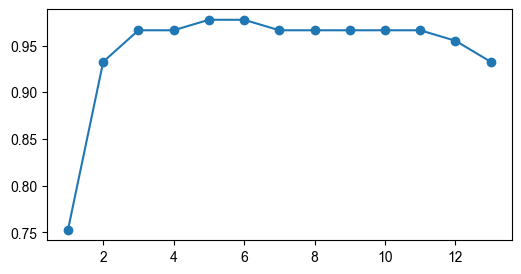

In [55]:
plt.figure(figsize=(6,3))
No=np.arange(1, len(best_score_list)+1)
plt.plot(No, best_score_list, marker='o', markersize=6)

### 可依主觀判斷決定選取特徵數，如以準確率收斂程度為判斷標準，可能會選擇3。

In [56]:
best_indices_list[2]

(6, 9, 12)

In [95]:
[np.array(X.columns)[i] for i in best_indices_list[2]]

['flavanoids', 'color_intensity', 'proline']

# 使用隨機森林比較

In [96]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

## 載入資料

In [97]:
X.columns.to_list()

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [98]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

column_list = X.columns.to_list().copy()
column_list[-2]='od280'
# print(indices)
# print([column_list[i] for i in indices])
for f in indices:
    print(f"{f+1:02d} {column_list[f]:20s} {importances[f]:.4f}")

10 color_intensity      0.1832
07 flavanoids           0.1565
12 od280                0.1390
13 proline              0.1347
01 alcohol              0.1107
11 hue                  0.0687
04 alcalinity_of_ash    0.0519
06 total_phenols        0.0471
09 proanthocyanins      0.0307
05 magnesium            0.0295
02 malic_acid           0.0207
03 ash                  0.0162
08 nonflavanoid_phenols 0.0112


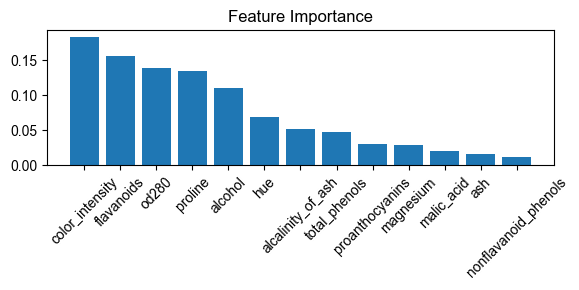

In [105]:
plt.figure(figsize=(6,3))
plt.title('Feature Importance')
plt.bar(range(len(importances)), 
        importances[indices],
        align='center')

plt.xticks(range(len(importances)), 
           np.array(column_list)[indices], rotation=45)
plt.tight_layout()
plt.show()

## Pareto chart

In [102]:
var_exp = importances[indices]
var_exp

array([0.18316182, 0.15649858, 0.13897485, 0.13466894, 0.11069571,
       0.06871541, 0.05193617, 0.04710526, 0.0307224 , 0.02946657,
       0.02065105, 0.016155  , 0.01124823])

In [103]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.18316182, 0.3396604 , 0.47863526, 0.61330419, 0.72399991,
       0.79271532, 0.84465149, 0.89175676, 0.92247915, 0.95194572,
       0.97259677, 0.98875177, 1.        ])

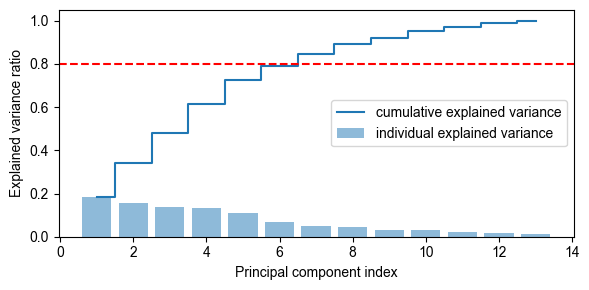

In [106]:
plt.figure(figsize=(6,3))
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.axhline(0.8, color='r', linestyle='--')
plt.show()